# **IMPORT LIBRARY**

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive

# **Set Path to Dataset**

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Paths to the dataset subfolders
base_path = '/content/drive/MyDrive/dataset'

# **DETEKSI PENYAKIT PADA GAMBAR**

In [94]:
# Load the pre-trained model
model = load_model('/content/drive/MyDrive/dog_disease_detection_model.h5')

# Folder containing test images
image_path = '/content/drive/MyDrive/dataset/testing/data/healthy.jpg'

# Define class labels
class_labels = ['Blepharitis', 'Conjunctivitis', 'Entropion', 'Eyelid Lump', 'Nuclear Sclerosis', 'Pigmented Keratitis']

In [95]:
# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    # Resize to match model input
    resized_image = cv2.resize(image, (224, 224))
    # Normalize pixel values
    normalized_image = resized_image.astype('float32') / 255.0
    # Expand dimensions for model (1, 224, 224, 3)
    normalized_image = np.expand_dims(normalized_image, axis=0)
    return image, normalized_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


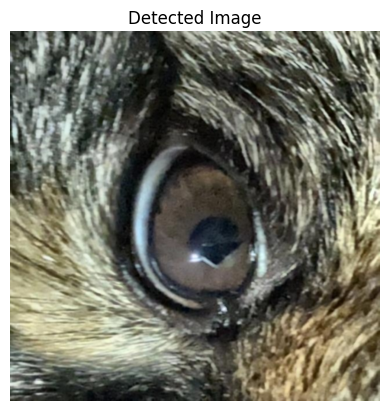

===== Top-3 Predictions =====
1. Nuclear Sclerosis - 48.51% confidence
2. Pigmented Keratitis - 25.42% confidence
3. Conjunctivitis - 20.21% confidence

The disease could not be detected with sufficient confidence.
Suggestion: Ensure the image is clear and check the animal's condition again.

Description:
Disease not detected. For now, we can only detect 6 diseases. If your dog shows unusual symptoms, please consult a veterinarian directly for a proper diagnosis.

Note:
Always consult with a veterinarian before administering any treatment to your dog. Proper diagnosis and treatment are crucial to ensure effective recovery and prevent further complications.


In [ ]:
# Function to predict the disease from the image
def predict_image(model, image_path):
    # Preprocess the image
    original_image, processed_image = preprocess_image(image_path)

    # Get predictions
    predictions = model.predict(processed_image)[0]

    # Get the top-3 predictions
    top_indices = predictions.argsort()[-3:][::-1]  # Sort indices by confidence (descending)
    top_labels = [class_labels[i] for i in top_indices]  # Map indices to class labels
    top_scores = [predictions[i] * 100 for i in top_indices]  # Convert probabilities to percentages

    # Display the original image
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Image")
    plt.axis('off')
    plt.show()

    # Print results
    print("===== Top-3 Predictions =====")
    for rank, (label, score) in enumerate(zip(top_labels, top_scores), start=1):
        print(f"{rank}. {label} - {score:.2f}% confidence")

    # Check if the top prediction confidence is below a threshold (60% in this case)
    if top_scores[0] < 70:  # Adjust the threshold as needed
        print("\nThe disease could not be detected with sufficient confidence.")
        print("Suggestion: Ensure the image is clear and check the animal's condition again.")
        description = (
            "Disease not detected. For now, we can only detect 6 diseases. If your dog shows unusual symptoms, please consult a veterinarian directly for a proper diagnosis."
        )
        print("\nDescription:")
        print(description)
    else:
        print(f"\nPredicted Class: {top_labels[0]} (Top Prediction)")
        print(f"Confidence: {top_scores[0]:.2f}%")

        if top_labels[0] == "Blepharitis":
            description = (
                "Blepharitis is an inflammation of the eyelids that can affect one or both eyelids of a dog. Common symptoms include redness, swelling, itching, and discharge from the eye area. Blepharitis can cause discomfort and may affect the dog's quality of life if left untreated."
            )
            treatment = [
                'Warm compress to reduce the risk of recurrence.',
                'Trim the hair around the eyes to reduce fluid buildup.',
                'Use baby shampoo to remove dirt that may clog the meibomian gland openings.',
            ]
        elif top_labels[0] == "Conjunctivitis":
            description = (
                "Conjunctivitis is an inflammation of the conjunctiva, which is the thin tissue lining the front of the eyeball and the inside of the eyelids. In dogs, conjunctivitis can cause redness, swelling, discharge from the eyes, and discomfort. This condition can be acute (sudden) or chronic (long-lasting)."
            )
            treatment = [
                'Use an eye cleaning solution to clean the area around the eyes from dirt and discharge.',
                'Avoid known allergens and use antihistamines if necessary.',
                'If conjunctivitis is caused by an underlying medical condition, treatment for that condition is also required.'
            ]
        elif top_labels[0] == "Entropion":
            description = (
                "Entropion is a condition where the eyelid, typically the lower eyelid, folds inward, causing the eyelashes and skin to touch the surface of the eye. This can lead to irritation, inflammation, and even damage to the cornea if left untreated. Entropion can occur in certain dog breeds and may be genetic or develop over time."
            )
            treatment = [
                'Accurate diagnosis is crucial to determine the severity of entropion and the appropriate treatment plan.',
                'Before surgery, the veterinarian may prescribe eye drops or ointments to reduce irritation and maintain corneal moisture.',
                'Surgery is the most effective method to correct entropion. The procedure involves removing excess eyelid tissue or tightening the eyelid to ensure it is in the correct position.'
            ]
        elif top_labels[0] == "Eyelid Lump":
            description = (
                "An eyelid lump is an abnormal growth or lump that appears in the dog's eyelid area. This lump can be benign (non-cancerous) or malignant (cancerous) and can cause discomfort, irritation, or vision impairment depending on its size and location on the eyelid. The lump can vary in size, shape, and consistency."
            )
            treatment = [
                'It is important to perform a thorough examination to determine the nature of the lump (benign or malignant) and plan the appropriate treatment.',
                'If the lump is caused by an infection, the veterinarian may prescribe antibiotics or anti-inflammatory medications.',
                'Surgery may be required to remove the lump, especially if it is considered malignant or causing vision problems.'
            ]
        elif top_labels[0] == "Nuclear Sclerosis":
            description = (
                "Nuclear Sclerosis is a common condition in dogs, typically occurring as they age. It is a normal change in the lens of the eye that causes the lens to become cloudy, primarily in the central part (nucleus). While it may look similar to cataracts, nuclear sclerosis does not impair vision as severely as cataracts and often does not require treatment."
            )
            treatment = [
                'Regularly monitor the dog\'s eye condition to determine if there are any changes in vision or development of cataracts.',
                'Visiting the veterinarian for regular eye exams can help detect problems early.',
                'If cataracts develop and affect vision, cataract removal surgery may be required.',
            ]
        elif top_labels[0] == "Pigmented Keratitis":
            description = (
                "Pigmented Keratitis is a condition where pigment (melanin) accumulates on the cornea, the clear part in front of the eye. This accumulation of pigment can lead to changes in the color of the cornea and may cause vision problems if left untreated. Pigmented keratitis often occurs alongside other conditions such as dry eye (keratoconjunctivitis sicca) or eye trauma."
            )
            treatment = [
                'Use artificial tear eye drops to maintain moisture in the cornea and reduce irritation.',
                'Topical steroids or non-steroidal anti-inflammatory drugs (NSAIDs) may be prescribed to reduce inflammation and irritation.',
                'Treat underlying conditions such as dry eye or entropion to prevent further damage to the cornea.',
                'In severe cases, if there is significant damage to the cornea, the veterinarian may recommend surgery to remove the pigment or repair the damage.'
            ]

        print("\nDisease Description:")
        print(f"{description}")
        print("\nTreatment Techniques and Advice:")
        for i, treatment in enumerate(treatment, start=1):
            print(f"{i}. {treatment}")

    note = "Always consult with a veterinarian before administering any treatment to your dog. Proper diagnosis and treatment are crucial to ensure effective recovery and prevent further complications."
    print("\nNote:")
    print(f"{note}")

    return top_indices, top_labels, top_scores

# Run the prediction on the provided image
try:
    top_indices, top_labels, top_scores = predict_image(model, image_path)
except Exception as e:
    print(f"Error: {e}")